In [156]:
import pymc3 as pm

import numpy as np
v=np.random.uniform(-1,1,size=5)

(v-(v.sum()/5)).sum()

(v+1/5-((v.sum())/5)).sum()

1.0

In [157]:
import torch
import hamiltorch
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'hamiltorch'

In [ ]:
import itertools

def generate_matrices(size, min_val, max_val):
    all_possible_values = range(min_val, max_val + 1)
    all_combinations = itertools.product(all_possible_values, repeat=size*size)
    
    for combination in all_combinations:
        yield [combination[i*size:(i+1)*size] for i in range(size)]

size = 5
min_val = -1000
max_val = 1000

for matrix in generate_matrices(size, min_val, max_val):
    print(matrix)


In [ ]:
import numpy as np

# Define the dimension of the data vector
n = 5

# Define the function to compute log likelihood
def log_likelihood(x, A):
    return -np.dot(np.dot(x, A.T), np.dot(A, x))
initial_index = np.random.randint(1, 6)

# Define the proposal distribution for Metropolis-Hastings
def proposal_uniform(current):
    return np.random.uniform(-1, 1, size=current.shape)

# Initialize the proposal covariance matrix
A = np.random.uniform(-1, 1, size=(n, n))

# Initialize the starting point for the Markov chain
current_state = np.random.uniform(-1, 1, size=n)

# Number of samples to generate
num_samples = 10000

# Burn-in period (number of initial samples to discard)
burn_in = 1000

# Initialize the samples list
samples = []

# Run Metropolis-Hastings algorithm
for _ in range(num_samples + burn_in):
    proposed_state = proposal_uniform(current_state)
    # Calculate the acceptance ratio
    acceptance_ratio = np.exp(log_likelihood(proposed_state, A) - log_likelihood(current_state, A))
    # Accept or reject the proposal
    if acceptance_ratio >= np.random.rand():
        current_state = proposed_state.copy()
    if _ >= burn_in:
        samples.append(current_state)

# Convert the list of samples into a NumPy array
samples = np.array(samples)

# Reshape the samples into a 5x5 matrix
samples_matrix = samples.reshape(-1, n)

print("Samples Matrix:")
print(samples_matrix)


In [26]:
from cgi import test
from src import Normalising_Flow
from dustmaps.lenz2017 import Lenz2017Query
import dustmaps
from astropy.coordinates import SkyCoord,Galactic
from dustmaps.sfd import SFDQuery
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from dustmaps.bayestar import BayestarQuery
from functorch import jacfwd

nf=Normalising_Flow.Normalising_Flow_Trainer()

#nf.train()

nf.load()
sfd = SFDQuery()
c_med = SkyCoord(304.303, -59.6786, unit="deg")
print(sfd.query(c_med))
extinction=np.array([0.306,2.69-0.306,0.717-0.306,0.464-0.306])
test_data=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data_test')[['parallax','ks_m','phot_g_mean_mag','j_m','h_m']]
test_data=test_data[:len(test_data)//10]
test_data=test_data[test_data['parallax']>0].reset_index(drop=True).values
for i in range(2,test_data.shape[1]):
    test_data[:,i]=test_data[:,i]-test_data[:,1]
test_data[:,1]=test_data[:,1]-2.5*np.log10(((1000/(test_data[:,0]))/10)**2)
    



test_data_scaled=(test_data[:,1:]-nf.mean[1:])







0.03842788


In [119]:
pd.read_csv('/Users/mattocallaghan/XPNorm/Data/err')[['g_error','bp_error','rp_error','j_msigcom','h_msigcom','ks_msigcom']].mean(0).values

array([0.00308123, 0.01036897, 0.0043106 , 0.03507253, 0.03733693,
       0.05396977])

In [124]:
p=test_data['parallax'].mean()
p_err=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/err')['parallax_error'].mean(0)

In [131]:
mean=[]
for i in range(10000):
    mean.append(2.5*np.log10(((1000/(p+p_err*np.random.normal()))/10)**2))
np.std(mean)

0.08675952341620922

In [123]:
p

1.288962195853142

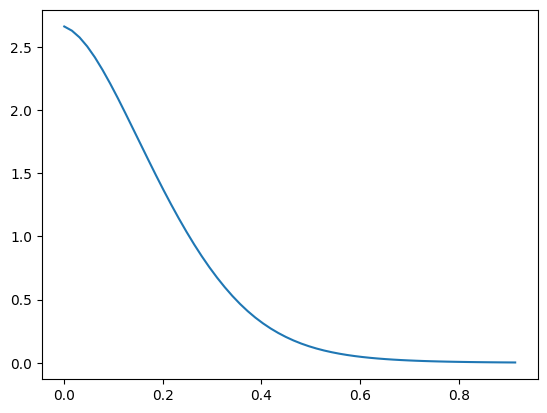

In [25]:
samples=[]
for i in np.arange(0.0,0.3,0.005):
    samples.append(nf.nfm.log_prob(torch.tensor(test_data_scaled-extinction*i)).detach().numpy().mean())
plt.plot(np.arange(0.0,0.3,0.005)*3.1,np.exp(samples))
plt.show()


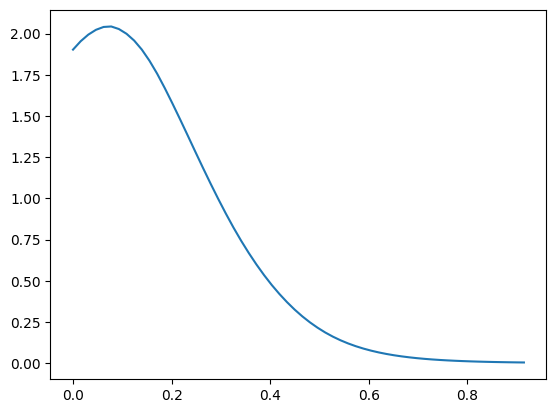

In [28]:
samples=[]
for i in np.arange(0.0,0.3,0.005):
    samples.append(nf.nfm.log_prob(torch.tensor(test_data_scaled-extinction*i)).detach().numpy().mean())
plt.plot(np.arange(0.0,0.3,0.005)*3.1,np.exp(samples))
plt.show()


In [82]:
import seaborn as sn

(10.0, -7.0)

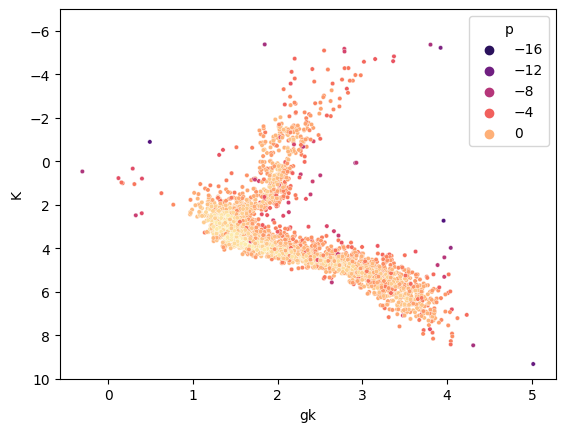

In [83]:
sn.scatterplot(data=test_data,x='gk',y='K',hue='p',palette='magma',s=10)
plt.ylim(10,-7)

In [94]:
test_data=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data')[['parallax','ks_m','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m']]
test_data=test_data[:len(test_data)//32]
test_data=test_data[test_data['parallax']>0].reset_index(drop=True)
test_data['K']=test_data['ks_m']-2.5*np.log10(((1000/(test_data['parallax']))/10)**2)
test_data['hk']=test_data['h_m']-test_data['ks_m']
test_data['bprp']=test_data['phot_bp_mean_mag']-test_data['phot_rp_mean_mag']
test_data['gk']=test_data['phot_g_mean_mag']-test_data['ks_m']
test_data['bpk']=test_data['phot_bp_mean_mag']-test_data['ks_m']
test_data['r']=1000/test_data['parallax']
test_data_2=test_data.copy()

test_data=pd.read_csv('/Users/mattocallaghan/XPNorm/Data/data_test')[['parallax','ks_m','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m']]
test_data=test_data[:len(test_data)//10]
test_data=test_data[test_data['parallax']>0].reset_index(drop=True)
test_data['K']=test_data['ks_m']-2.5*np.log10(((1000/(test_data['parallax']))/10)**2)
test_data['p']=nf.nfm.log_prob(torch.tensor(test_data_scaled-extinction*np.arange(0.0,0.3,0.005)[0])).detach().numpy()
test_data['gk']=test_data['phot_g_mean_mag']-test_data['ks_m']
test_data['hk']=test_data['h_m']-test_data['ks_m']
test_data['bprp']=test_data['phot_bp_mean_mag']-test_data['phot_rp_mean_mag']
test_data['bpk']=test_data['phot_bp_mean_mag']-test_data['ks_m']
test_data['r']=1000/test_data['parallax']

/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_41523/137091296.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.scatterplot(data=test_data,y='r',x='bprp',palette='magma',s=5)
/var/folders/v8/qszwt8g90wj00vpb5s08vpdw0000gn/T/ipykernel_41523/137091296.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sn.scatterplot(data=test_data_2,y='r',x='bprp',palette='magma',s=5)


(0.0, 4000.0)

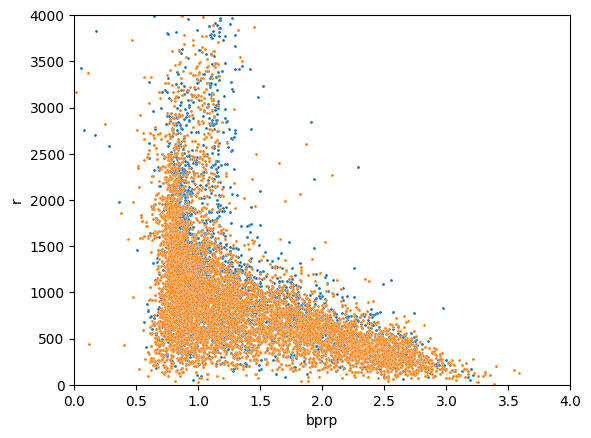

In [101]:
sn.scatterplot(data=test_data,y='r',x='bprp',palette='magma',s=5)
sn.scatterplot(data=test_data_2,y='r',x='bprp',palette='magma',s=5)

plt.xlim(0,4)
plt.ylim(0,4000)

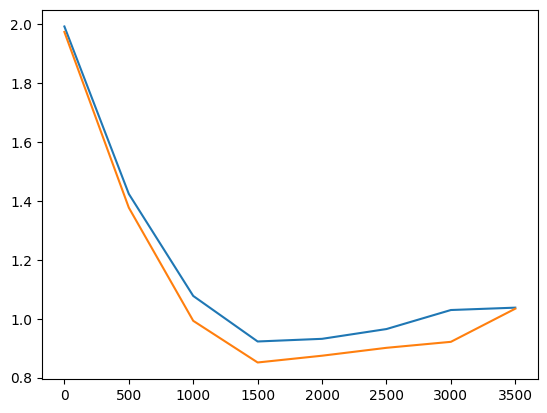

In [114]:
bins = pd.cut(test_data['r'], bins=range(0, 4001, 500), right=False)

# Add the bins as a new column to your DataFrame
test_data['r_bins'] = bins

# Calculate the mean 'bprp' values within each bin
mean_bprp_by_bin = test_data.groupby('r_bins')['bprp'].mean().reset_index()

bins = pd.cut(test_data_2['r'], bins=range(0, 4001, 500), right=False)

# Add the bins as a new column to your DataFrame
test_data_2['r_bins'] = bins

# Calculate the mean 'bprp' values within each bin
mean_bprp_by_bin_2 = test_data_2.groupby('r_bins')['bprp'].mean().reset_index()

plt.plot(range(0, 4000, 500),mean_bprp_by_bin['bprp'])
plt.plot(range(0, 4000, 500),mean_bprp_by_bin_2['bprp'])

<Axes: xlabel='bpk', ylabel='Density'>

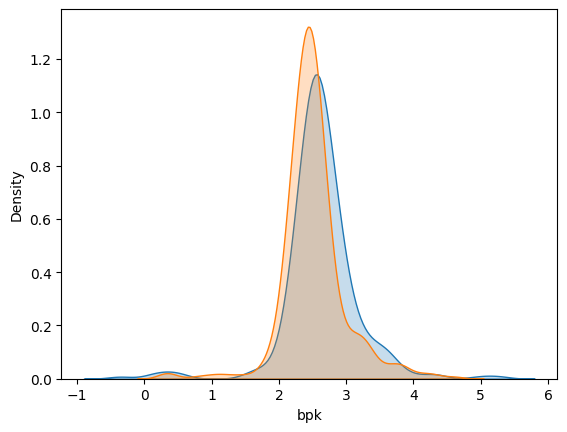

In [88]:
sn.kdeplot(test_data[test_data['K']<1]['bpk'],fill=True)
sn.kdeplot(test_data_2[test_data_2['K']<1]['bpk'],fill=True)

In [30]:
np.array(np.exp(samples)).argmax()

5

In [18]:
np.sqrt((np.gradient(np.array(samples))/np.gradient(np.arange(0.0,0.3,0.005)))[4]**2)

0.7290578042014827

In [4]:
np.arange(-0.3,0.3,0.01)[np.argmax(np.exp(samples))]

0.020000000000000295